<a href="https://colab.research.google.com/github/ShangZhang4Food/wine_classification/blob/main/Sparkling_Wine_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import the necessary libraries.
# !pip install opendatasets.
import opendatasets as od
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as mse
from sklearn.neighbors import KNeighborsClassifier
from scipy.stats import zscore
'''
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.utils import shuffle


'''

import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings(action = 'ignore', category = DeprecationWarning)
warnings.filterwarnings(action = 'ignore', category = FutureWarning)

### Step 1: Preparation
The first step is to import the data from Kaggle and get familarize with the data. For example, the variables with null values need to be identified. It is acceptable to take out the variable if there are too many null values. If there are just a few null values, imputation techniques can be applied to fill the missing values. 



In [2]:
# Import the dataset from Kaggle
od.download("https://www.kaggle.com/piyushagni5/white-wine-quality")
# Obtain the username and password from the Kaggle API, following the following format: 
# {"username":<KAGGLE USERNAME>,"key":"<KAGGLE KEY>"}

# Display the dataset
df = pd.read_csv("white-wine-quality/winequality-white.csv", sep = ';')
df.head(5)

Skipping, found downloaded files in "./white-wine-quality" (use force=True to force download)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [3]:
# Check whether there are null values in the dataset. 
df.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

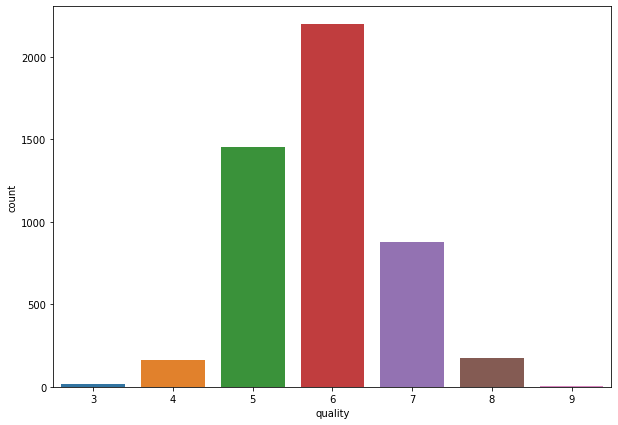

In [4]:
# Visualize the wine quality distribution. 
plt.figure(figsize = (10,7))
sns.countplot(x = df['quality'].astype('category'))

In [5]:
df.describe(include='all')

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


### Step 2: Z-score normalization and Spliting the data
The immediate observation from the statistics of all variables is that their magnitudes vary and their units are mostly different from each other. Therefore, normalization is necessary to make sure that the variables have the same scale so each variable is equally important. In this case, z-score normalization technique is used.

Then to split the data, the training-validation-testing datasets are split by 3:1:1 ratio. 

In [6]:
df.columns.values[:-1]

array(['fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol'],
      dtype=object)

In [7]:
# Separate the dependent and independent variables. 
# X = df.drop('quality', axis=1)
y = df['quality'].astype('category')

# Apply the z-score to all features. 
input_variables = df.columns.values[:-1]
X = df[input_variables].apply(zscore)

In [8]:


X_train, X_rest, y_train, y_rest = train_test_split(X,y, train_size=0.6)
X_valid, X_test, y_valid, y_test = train_test_split(X_rest,y_rest, test_size=0.5)

print(X_train.shape),print(y_train.shape)
print(X_valid.shape),print(y_valid.shape)
print(X_test.shape),print(y_test.shape);

(2938, 11)
(2938,)
(980, 11)
(980,)
(980, 11)
(980,)


### Step 3: Training the Model and Validation

Needs more explanation texts here!



In [9]:
x_list = []
rmse_list = []

for k in range(1,30):
  sum_rmse = 0
  for i in range(30):
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    prediction = knn.predict(X_valid)
    rmse = np.sqrt(mse(y_valid, prediction))
    sum_rmse += rmse
  x_list.append(k)
  rmse_list.append(sum_rmse/30)

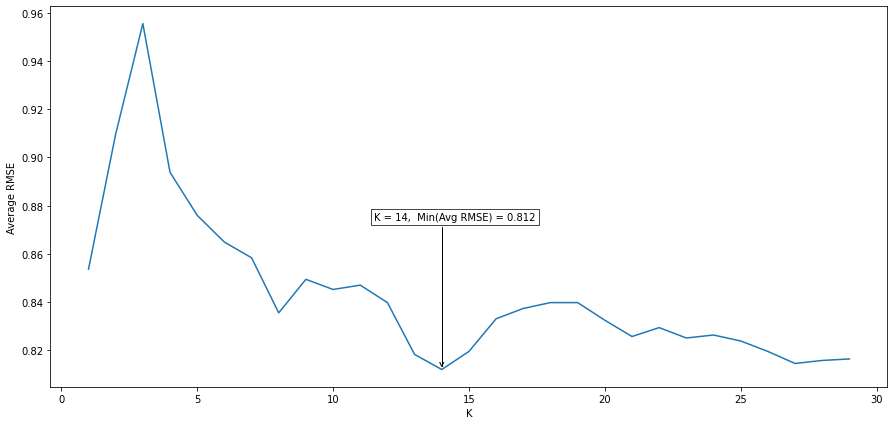

In [32]:
fig, ax = plt.subplots(figsize=(15,7))
ax.plot(x_list, rmse_list)

def annot_max(x,y, ax=None):
    xmax = x[np.argmin(y)]
    ymax = min(y)
    text= "K = {:.0f},  Min(Avg RMSE) = {:.3f}".format(xmax, ymax)
    if not ax:
        ax=plt.gca()
    bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
    arrowprops=dict(arrowstyle="->",connectionstyle="angle,angleA=0,angleB=90")
    kw = dict(xycoords='data',textcoords="axes fraction",
              arrowprops=arrowprops, bbox=bbox_props, ha="right", va="top")
    ax.annotate(text, xy=(xmax, ymax), xytext=(0.58,0.46), **kw)

annot_max(x_list,rmse_list)

plt.xlabel("K")
plt.ylabel("Average RMSE")
plt.show()

### Step 4: Testing and Performance Report. 

Needs more explanation texts here!